# Word Embeddings Tutorial

We will be using some utilities form the Gensim package.
For more details on the implementation of word2vec in gensim, see this tutorial https://rare-technologies.com/word2vec-tutorial/.

## Install Gensim.

In [59]:
!pip3 install gensim

Defaulting to user installation because normal site-packages is not writeable


Define a helper function for downloading files.

In [60]:
import urllib.request
import os

def download_file(url, local_file):
    """
    Helper function to download a file and store it locally
    """
    if not os.path.exists(local_file):
        print('Downloading')
        with urllib.request.urlopen(url) as opener, \
             open(local_file, mode='wb') as outfile:
                    outfile.write(opener.read())
    else:
        print('Already downloaded')

Let's use a corpus from Peter Norvig.

In [61]:
big_text_file = 'data/big.txt'
download_file('http://norvig.com/big.txt', big_text_file)

Already downloaded


Convert each line in the file into a list of tokens:

In [62]:
with open(big_text_file, mode='r', encoding='utf-8') as infile:
    for i in range(10):
        line = next(infile)
        print(line)

The Project Gutenberg EBook of The Adventures of Sherlock Holmes

by Sir Arthur Conan Doyle

(#15 in our series by Sir Arthur Conan Doyle)



Copyright laws are changing all over the world. Be sure to check the

copyright laws for your country before downloading or redistributing

this or any other Project Gutenberg eBook.



This header should be the first thing seen when viewing this Project

Gutenberg file.  Please do not remove it.  Do not change or edit the



In [63]:
import re

sentences = []
with open(big_text_file, mode='r', encoding='utf-8') as infile:
    for line in infile:
        sentences.append(re.split('[\W\d_]+', line.lower()))

Enable logging the execution of gensim.

In [64]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Train a `word2vec` model on this corpus.

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences, size=100, window=10, min_count=5, sg=1, iter=20, workers=8, negative=10)

The method `most_similar` returns the top 10 closest words to the input, according to euclidean (L2) distance between their embedding vectors.

In [69]:
model.wv.most_similar('lemon')

[('parchment', 0.7194594740867615),
 ('chocolate', 0.7141339778900146),
 ('robber', 0.7136014699935913),
 ('voltaire', 0.7000627517700195),
 ('basic', 0.6810798645019531),
 ('orange', 0.6780054569244385),
 ('conscientious', 0.6769378781318665),
 ('symbols', 0.6705729961395264),
 ('magazines', 0.669700026512146),
 ('hound', 0.6680736541748047)]

Embedding vectors are stored in `model.vw`, here the vector of a word:

In [70]:
model.wv['project']

array([-2.5432853e-02,  1.7475882e-01, -2.4659063e-01,  1.5796936e-01,
       -1.5934931e-01, -6.4758068e-01, -2.3359986e-01, -6.1180305e-01,
       -5.1521289e-01,  6.1115885e-01, -8.6010331e-01, -2.7175543e-01,
        4.1587451e-01,  9.4346142e-01, -2.1622545e-01,  1.1367339e-01,
       -2.9938603e-02,  5.4370159e-01, -3.1393487e-02,  3.1429020e-01,
       -3.5453072e-01,  1.0455128e+00, -3.1041902e-01, -7.5869292e-01,
        1.8373707e-01, -5.8236009e-01,  7.8112155e-01,  1.1550092e+00,
        4.6694726e-01, -9.9365258e-01, -2.3194110e-02, -2.8324774e-01,
        2.7289498e-01, -7.6772898e-02,  5.0243080e-01, -6.8995404e-01,
        5.4123241e-02,  1.4126004e-02,  6.2727880e-01,  5.0530732e-01,
       -1.1450762e-01,  6.4593035e-01,  7.6572210e-01,  4.5214301e-01,
       -4.7532442e-01,  8.4757209e-01,  1.3727783e-01,  8.9591360e-01,
       -9.5968646e-01,  1.7984517e-01, -7.4194402e-02, -1.9932204e-01,
        3.1237483e-01,  8.1662911e-01, -4.3899754e-01, -1.3364074e-01,
      

## Compute the similarity of among all embeddings and plot them.
We will use `sklearn`.

In [71]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [72]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(model.wv.vectors)

In [79]:
similarities[1,2]

0.80474955

Load the analogy test and measure the accuracy:

In [ ]:
test_file = 'data/questions-words.txt'
download_file('http://download.tensorflow.org/data/questions-words.txt', test_file)

model.wv.evaluate_word_analogies(test_file)

# Explore embeddings from the Google News corpus

Download pretrained word embeddings from https://code.google.com/archive/p/word2vec/ and gunzip the file.
The two cells below do the work, otherwise you can do it manually.
__WARNING__: the gz file is 1.5GB, the extracted model is 3.5GB!

In [80]:
google_w2v_file = 'data/GoogleNews-vectors-negative300.bin'
download_file('https://s3.amazonaws.com/mordecai-geo/GoogleNews-vectors-negative300.bin.gz',
              google_w2v_file+'.gz')

Already downloaded


The file is compressed, it must be uncompressed:

In [81]:
!if [ ! -f data/GoogleNews-vectors-negative300.bin ]; then gunzip data/GoogleNews-vectors-negative300.bin.gz; fi

Google's vector were computed some time ago. It requires a special command to be loaded. Use this code if you want to use Google's embeddings in your code.

In [82]:
news_model = gensim.models.KeyedVectors.load_word2vec_format(google_w2v_file, binary=True)

2020-02-27 09:44:53,270 : INFO : loading projection weights from data/GoogleNews-vectors-negative300.bin
2020-02-27 09:47:32,413 : INFO : loaded (3000000, 300) matrix from data/GoogleNews-vectors-negative300.bin


## Playing with word similarity

See words which are closer in the embeddings vector space.

In [83]:
news_model.most_similar(['sun'])

2020-02-27 09:47:58,687 : INFO : precomputing L2-norms of word weight vectors


[('sunlight', 0.7269680500030518),
 ('sun_rays', 0.6871298551559448),
 ('sunshine', 0.6767958402633667),
 ('sunrays', 0.6644463539123535),
 ('noonday_sun', 0.6227596402168274),
 ('rays', 0.601547360420227),
 ('suns_rays', 0.5943776369094849),
 ('dried_tomato_basil', 0.5823874473571777),
 ('sun_shining', 0.5802727937698364),
 ('UV_rays', 0.5749224424362183)]

In [18]:
news_model.most_similar('obama')

[('mccain', 0.7319011688232422),
 ('hillary', 0.7284599542617798),
 ('obamas', 0.7229631543159485),
 ('george_bush', 0.7205674648284912),
 ('barack_obama', 0.7045838832855225),
 ('palin', 0.7043113708496094),
 ('clinton', 0.6934447884559631),
 ('clintons', 0.6816834211349487),
 ('sarah_palin', 0.6815145611763),
 ('john_mccain', 0.6800708770751953)]

In [84]:
news_model.most_similar('apple')

[('apples', 0.720359742641449),
 ('pear', 0.6450696587562561),
 ('fruit', 0.6410146355628967),
 ('berry', 0.6302294731140137),
 ('pears', 0.613396167755127),
 ('strawberry', 0.6058260798454285),
 ('peach', 0.6025872230529785),
 ('potato', 0.596093475818634),
 ('grape', 0.5935864448547363),
 ('blueberry', 0.5866668820381165)]

In [85]:
news_model.most_similar(negative=['banana'])

[('NORWALK_CONN', 0.23768547177314758),
 ('JIM_HANNON_TimesDaily', 0.2376764714717865),
 ('KITCHENER_ONTARIO', 0.23705120384693146),
 ('DENVER_CO_PRWEB', 0.23474794626235962),
 ('GRANDE_BAY_MAURITIUS', 0.23164315521717072),
 ('Dr._Parviz_Azar', 0.22826240956783295),
 ('HuMax_IL8_TM', 0.22697213292121887),
 ('subsidiary_Airstar', 0.22571393847465515),
 ('AB_OMX_Stockholm', 0.2248857468366623),
 ('MotoTron_electronic_controls', 0.22116824984550476)]

Which word is in the same relation to `female` as `man` to `king`?

This method computes cosine similarity between a simple mean of the projection weight vectors of the given words.

In [86]:
news_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118191719055176),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

Function to find an analogy

In [87]:
def analogy(x1, x2, y1):
    result = news_model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [88]:
analogy('japan', 'japanese', 'australia')

'canada'

In [89]:
analogy('australia', 'beer', 'france')

'beers'

In [90]:
analogy('obama', 'clinton', 'reagan')

'kerry'

In [91]:
analogy('tall', 'tallest', 'long')

'longest'

In [92]:
analogy('good', 'fantastic', 'bad')

'horrible'

Which word is in the same relation to `warm` as `summer` to `cold`?

In [93]:
news_model.most_similar(['summer', 'cold'], ['warm'])

[('winter', 0.5936813950538635),
 ('spring', 0.550656259059906),
 ('summertime', 0.5165988206863403),
 ('summers', 0.5085427761077881),
 ('autumn', 0.49106645584106445),
 ('week', 0.45701587200164795),
 ('midwinter', 0.45652201771736145),
 ('Summer', 0.4489293098449707),
 ('springtime', 0.4475139081478119),
 ('month', 0.44610556960105896)]

Accuracy in the analogy test is much better than our very small model

In [ ]:
news_model.accuracy(test_file)

Which word from the given list doesn’t go with the others?

In [95]:
news_model.doesnt_match(['sun', 'moon', 'sand', 'jupiter'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'sand'

In [96]:
news_model.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

# Visualize embeddings

Explore the vectors, by mapping them into 2 dimensions and plotting them on the plane.

In [ ]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Use Principal Compoment Analysis in order to reduce the size of the array made with word embeddings vectors.

In [97]:
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None, sample=0):
    """
    Collect from ::parameter: model the vectors for the given :parameter: words.
 
    Apply PCA to the matrix to project into 2 dimensional space, then plot them.
    """
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

Show the vectors for a list of words in 2 dimensions.

<IPython.core.display.Javascript object>


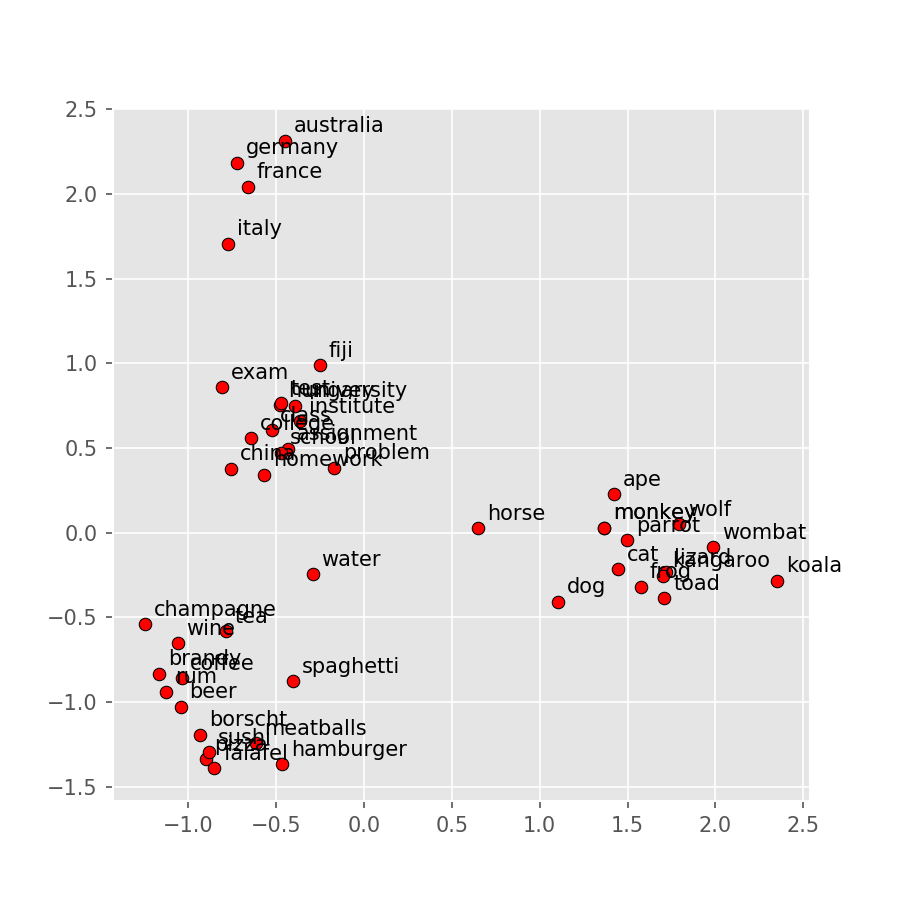

In [98]:
display_pca_scatterplot(news_model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'italy', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])


In [107]:
cosine_similarity(np.stack((news_model.wv['beer'],news_model.wv['italy'])))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([[1.0000001 , 0.09480633],
       [0.09480633, 0.9999993 ]], dtype=float32)

Check the distance between two words:

In [ ]:
np.linarg.norm(news_model.wv['beer'] - news_model.wv['italy'])

# Explore embeddings from the Italian Wikipedia

Load word embeddings of dimension 100, trained on the text of the Italian WikiPedia.

In [108]:
italian = gensim.models.KeyedVectors.load_word2vec_format('data/it-vectors.100.5.50.w2v')

2020-02-27 10:15:14,248 : INFO : loading projection weights from data/it-vectors.100.5.50.w2v
2020-02-27 10:16:37,501 : INFO : loaded (214689, 100) matrix from data/it-vectors.100.5.50.w2v


In [109]:
italian.most_similar(['Francia'])

2020-02-27 10:16:38,060 : INFO : precomputing L2-norms of word weight vectors


[('Belgio', 0.8703928589820862),
 ('Spagna', 0.8083794713020325),
 ('Lussemburgo', 0.7751995921134949),
 ('Svezia', 0.7663754224777222),
 ('Danimarca', 0.7570080161094666),
 ('Svizzera', 0.749411940574646),
 ('Portogallo', 0.7451502084732056),
 ('Olanda', 0.7380844950675964),
 ('Germania', 0.7370772957801819),
 ('Norvegia', 0.7283455729484558)]

Which word is in the same relation to `donna` as `uomo` to `re`?

This method computes cosine similarity between a simple mean of the projection weight vectors of the given words.

In [110]:
italian.most_similar(['donna', 're'], ['uomo'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('regina', 0.7099511623382568),
 ('consorte', 0.653093695640564),
 ('sposa', 0.6479295492172241),
 ('principessa', 0.633419394493103),
 ('Ranavalona', 0.6286108493804932),
 ('vedova', 0.6271299123764038),
 ('Brunechilde', 0.624060869216919),
 ('Haakon', 0.6232239007949829),
 ('Richilde', 0.6197010278701782),
 ('reggente', 0.6190868616104126)]

Word embedding do not capture the distiction between positive/negative polarity of adjectiuves:

In [111]:
italian.most_similar(['buono'])

[('cattivo', 0.8344665169715881),
 ('stupido', 0.8254504203796387),
 ('sciocco', 0.8137079477310181),
 ('noioso', 0.811944305896759),
 ('pigro', 0.7901057004928589),
 ('vigliacco', 0.7848994731903076),
 ('ignorante', 0.7752730846405029),
 ('carino', 0.7609102725982666),
 ('onesto', 0.7528376579284668),
 ('spregevole', 0.7483676671981812)]